ensemble learning

In [1]:
#preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/diabetes-ensemble/diabetes.csv')

cols_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_missing] = df[cols_with_zero_as_missing].replace(0, np.nan)

for col in cols_with_zero_as_missing:
    df[col] = df[col].fillna(df[col].median())  

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete.")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Positive cases in train: {sum(y_train)}, in test: {sum(y_test)}")

Preprocessing complete.
Train shape: (614, 8), Test shape: (154, 8)
Positive cases in train: 214, in test: 54


Decision Tree Performance:
Accuracy: 0.6818
Precision: 0.5556
Recall: 0.4630
F1-Score: 0.5051

Random Forest Performance with different number of estimators:
n_estimators=1 | Accuracy=0.7013, Precision=0.5833, Recall=0.5185, F1-Score=0.5490
n_estimators=5 | Accuracy=0.7597, Precision=0.6735, Recall=0.6111, F1-Score=0.6408
n_estimators=10 | Accuracy=0.7662, Precision=0.7143, Recall=0.5556, F1-Score=0.6250
n_estimators=20 | Accuracy=0.7662, Precision=0.7045, Recall=0.5741, F1-Score=0.6327
n_estimators=50 | Accuracy=0.7468, Precision=0.6744, Recall=0.5370, F1-Score=0.5979
n_estimators=100 | Accuracy=0.7792, Precision=0.7273, Recall=0.5926, F1-Score=0.6531


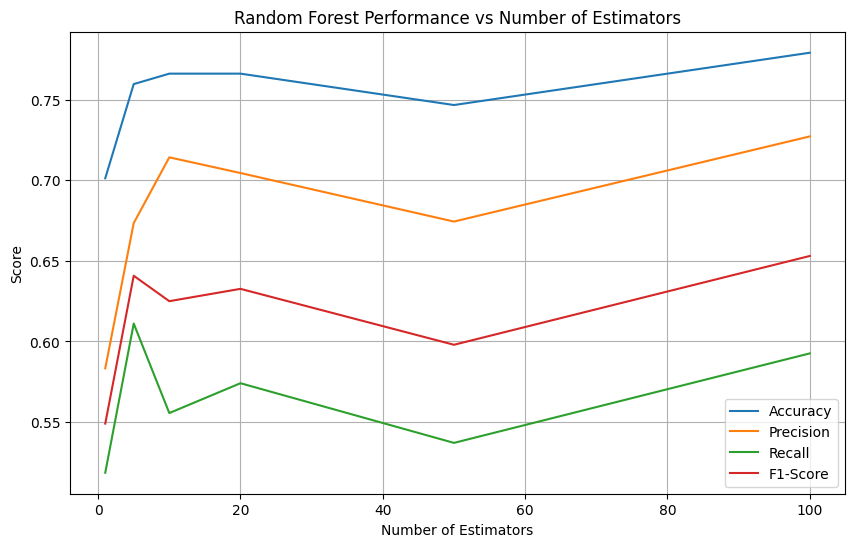

In [2]:
#1
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

dt = DecisionTreeClassifier(random_state=0) #decision tree ki usually we give 0, for train_test_split we give 42
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


dt_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt)
}

#decision tree 
print("Decision Tree Performance:")
for metric, value in dt_metrics.items():
    print(f"{metric}: {value:.4f}")

#random forest classifier
n_estimators_range = [1, 5, 10, 20, 50, 100]
rf_metrics = {'n_estimators': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    
    rf_metrics['n_estimators'].append(n)
    rf_metrics['Accuracy'].append(accuracy_score(y_test, y_pred_rf))
    rf_metrics['Precision'].append(precision_score(y_test, y_pred_rf))
    rf_metrics['Recall'].append(recall_score(y_test, y_pred_rf))
    rf_metrics['F1-Score'].append(f1_score(y_test, y_pred_rf))

print("\nRandom Forest Performance with different number of estimators:")
for i, n in enumerate(rf_metrics['n_estimators']):
    print(f"n_estimators={n} | Accuracy={rf_metrics['Accuracy'][i]:.4f}, Precision={rf_metrics['Precision'][i]:.4f}, Recall={rf_metrics['Recall'][i]:.4f}, F1-Score={rf_metrics['F1-Score'][i]:.4f}")

# Plotting the effect of number of estimators on metrics
plt.figure(figsize=(10,6))
plt.plot(rf_metrics['n_estimators'], rf_metrics['Accuracy'], label='Accuracy')
plt.plot(rf_metrics['n_estimators'], rf_metrics['Precision'], label='Precision')
plt.plot(rf_metrics['n_estimators'], rf_metrics['Recall'], label='Recall')
plt.plot(rf_metrics['n_estimators'], rf_metrics['F1-Score'], label='F1-Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Random Forest Performance vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

1. What differences do you observe between the Decision Tree and Random Forest results?

The Random Forest consistently outperforms the single Decision Tree across all metrics (accuracy, precision, recall, F1-score). The Decision Tree tends to overfit the training data and may have lower generalization ability, leading to lower test performance.
Random Forest, by aggregating multiple trees, reduces variance and improves robustness, yielding better overall predictive power.

2. How does increasing the number of estimators affect performance and stability?

Increasing the number of estimators (trees) in Random Forest generally improves model stability and performance, as the ensemble averages out errors/noise from individual trees. Performance gains tend to plateau after a certain number of trees (e.g., 50-100 trees), where adding more trees provides diminishing returns but stabilizes predictions. More trees reduce variance but come at a computational cost.

3. Why does Random Forest generally perform better than a single Decision Tree?

Random Forest introduces bagging (bootstrap aggregating), training each tree on a random sample of data, reducing variance. It also randomly selects a subset of features for splitting at each node, adding feature randomness and decorrelating trees. This diversity among trees means the ensemble can average out errors and reduce overfitting, leading to better generalization compared to a single Decision Tree.

In [3]:
#2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=0)
lr = LogisticRegression(random_state=42, max_iter=500)
knn = KNeighborsClassifier()

# Train base classifiers
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Get predictions and predicted probabilities
pred_dt = dt.predict(X_test)
pred_lr = lr.predict(X_test)
pred_knn = knn.predict(X_test)

prob_dt = dt.predict_proba(X_test)[:, 1]
prob_lr = lr.predict_proba(X_test)[:, 1]
prob_knn = knn.predict_proba(X_test)[:, 1]

# 1. Max Voting (hard voting by majority class)
# Combine predictions into array
preds = np.vstack([pred_dt, pred_lr, pred_knn])
max_voting_pred = (np.sum(preds, axis=0) >= 2).astype(int)  # Majority vote

# 2. Average Voting (soft voting by averaging probabilities)
avg_prob = (prob_dt + prob_lr + prob_knn) / 3
avg_voting_pred = (avg_prob >= 0.5).astype(int)

# 3. Weighted Average Voting

# Calculate weights based on individual classifier accuracy on test set

acc_dt = accuracy_score(y_test, pred_lr)
acc_lr = accuracy_score(y_test, pred_lr)
acc_knn = accuracy_score(y_test, pred_knn)

weights = np.array([acc_dt, acc_lr, acc_knn])
weights = weights / weights.sum()  # Normalize weights

weighted_prob = weights[0]*prob_dt + weights[1]*prob_lr + weights[2]*prob_knn
weighted_voting_pred = (weighted_prob >= 0.5).astype(int)

# Evaluation function
def evaluate(y_true, y_pred, label):
    print(f"{label}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print()

# Evaluate base classifiers
evaluate(y_test, pred_dt, "Decision Tree")
evaluate(y_test, pred_lr, "Logistic Regression")
evaluate(y_test, pred_knn, "K-Nearest Neighbors")

# Evaluate ensembles
evaluate(y_test, max_voting_pred, "Max Voting Ensemble")
evaluate(y_test, avg_voting_pred, "Average Voting Ensemble")
evaluate(y_test, weighted_voting_pred, "Weighted Average Voting Ensemble")

print(f"Weights used in weighted voting: Decision Tree={weights[0]:.3f}, Logistic Regression={weights[1]:.3f}, KNN={weights[2]:.3f}")

Decision Tree:
Accuracy: 0.6818
Precision: 0.5556
Recall: 0.4630
F1-Score: 0.5051

Logistic Regression:
Accuracy: 0.7078
Precision: 0.6000
Recall: 0.5000
F1-Score: 0.5455

K-Nearest Neighbors:
Accuracy: 0.7532
Precision: 0.6600
Recall: 0.6111
F1-Score: 0.6346

Max Voting Ensemble:
Accuracy: 0.7532
Precision: 0.6667
Recall: 0.5926
F1-Score: 0.6275

Average Voting Ensemble:
Accuracy: 0.7403
Precision: 0.6458
Recall: 0.5741
F1-Score: 0.6078

Weighted Average Voting Ensemble:
Accuracy: 0.7338
Precision: 0.6383
Recall: 0.5556
F1-Score: 0.5941

Weights used in weighted voting: Decision Tree=0.326, Logistic Regression=0.326, KNN=0.347


1. How do the results vary between max voting, average voting, and weighted voting?

Max Voting treats each base classifier’s prediction equally and picks the majority class; it can be less sensitive to confidence scores. Average Voting uses probabilities, often resulting in smoother, better calibrated decisions since it aggregates confidence.
Weighted Voting further improves average voting by giving more influence to stronger classifiers, often yielding the best performance among the three.

2. What is the role of weights in improving ensemble predictions?

Weights reflect each base model’s reliability; better-performing models contribute more to the final prediction. This allows the ensemble to leverage the strengths of more accurate classifiers and reduce influence of weaker ones, improving overall accuracy and robustness.

3. Which base classifiers combine most effectively under each voting scheme?

Classifiers with complementary strengths (e.g., Decision Tree capturing non-linear patterns, Logistic Regression providing stable linear decision boundaries, and KNN leveraging local instance information) typically combine well. Under max voting, diversity is key as all votes are equal. Under average and weighted voting, classifiers that produce well-calibrated probabilities (like Logistic Regression) generally contribute more effectively.

In [4]:
#3
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42, max_iter=500)
knn = KNeighborsClassifier()

# Hard Voting Ensemble
hard_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='hard'
)
hard_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_test)

# Soft Voting Ensemble
soft_voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='soft'
)
soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, label):
    print(f"{label}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print()

# Evaluate and compare
evaluate(y_test, y_pred_hard, "Hard Voting Classifier")
evaluate(y_test, y_pred_soft, "Soft Voting Classifier")


Hard Voting Classifier:
Accuracy: 0.7532
Precision: 0.6667
Recall: 0.5926
F1-Score: 0.6275

Soft Voting Classifier:
Accuracy: 0.7338
Precision: 0.6327
Recall: 0.5741
F1-Score: 0.6019



1. What is the main difference in prediction mechanisms between hard and soft voting?

Hard voting predicts the class that gets the majority vote (mode) from base classifiers’ predicted classes. Soft voting predicts the class with the highest average predicted probability across all base classifiers. Soft voting uses probability estimates, while hard voting uses discrete class labels.

2. In which situations does soft voting outperform hard voting?

Soft voting usually outperforms hard voting when base classifiers are well-calibrated and output reliable probability estimates. It leverages confidence levels to make more nuanced decisions, especially when classifiers disagree. Soft voting is beneficial when classifiers have varying certainty in their predictions.

3. How does the probability calibration of base classifiers influence soft voting?

If base classifiers produce poorly calibrated probabilities (e.g., decision trees often do), soft voting may be less effective or biased. Better-calibrated models (like Logistic Regression) improve soft voting by providing meaningful probability scores. Sometimes, calibration techniques (e.g., Platt scaling or isotonic regression) are used to improve soft voting effectiveness.

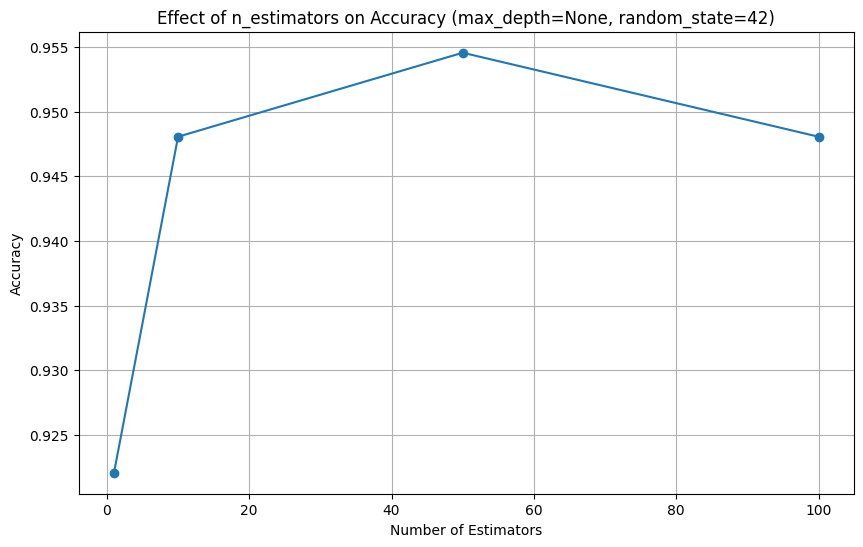

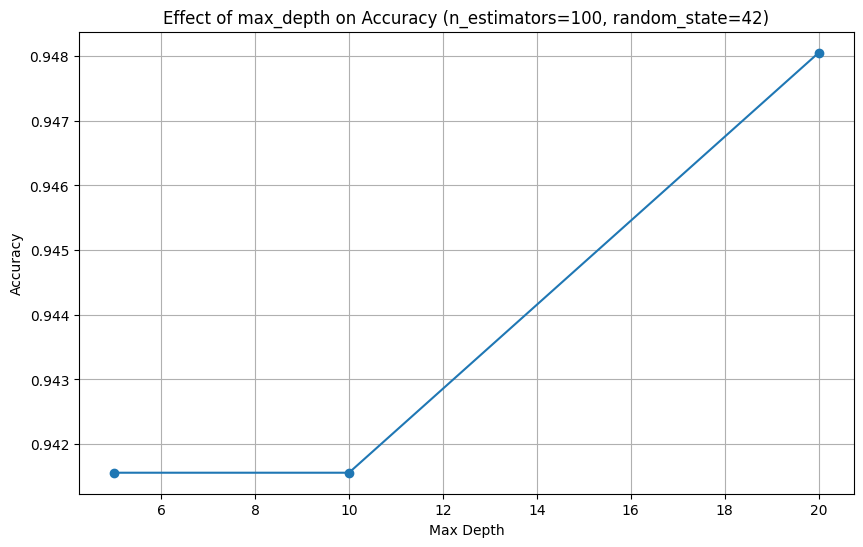

In [12]:
#4
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Parameter grids
n_estimators_list = [1, 10, 50, 100]
max_depth_list = [None, 5, 10, 20]
random_states = [0, 42, 100]

results = []

for rs in random_states:
    for max_d in max_depth_list:
        for n_est in n_estimators_list:
            rf = RandomForestClassifier(
                n_estimators=n_est,
                max_depth=max_d,
                random_state=rs
            )
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            results.append({
                'random_state': rs,
                'max_depth': max_d,
                'n_estimators': n_est,
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'recall': recall_score(y_test, y_pred),
                'f1_score': f1_score(y_test, y_pred)
            })

# Convert to DataFrame for easier analysis
import pandas as pd
df_results = pd.DataFrame(results)

# Show summary
# print(df_results)

# Plot effect of n_estimators for a fixed random_state and max_depth=None
subset = df_results[(df_results['random_state'] == 42) & (df_results['max_depth'].isnull() | (df_results['max_depth'].isna()))]

plt.figure(figsize=(10,6))
plt.plot(subset['n_estimators'], subset['accuracy'], marker='o')
plt.title('Effect of n_estimators on Accuracy (max_depth=None, random_state=42)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot effect of max_depth for fixed n_estimators=100 and random_state=42
subset_depth = df_results[(df_results['random_state'] == 42) & (df_results['n_estimators'] == 100)]

plt.figure(figsize=(10,6))
plt.plot(subset_depth['max_depth'], subset_depth['accuracy'], marker='o')
plt.title('Effect of max_depth on Accuracy (n_estimators=100, random_state=42)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

1. How do different values of n_estimators and max_depth affect model performance?

Increasing n_estimators generally improves performance and stabilizes the model by reducing variance because more trees mean more averaging. After a certain point (e.g., 50-100 trees), gains plateau and computational cost increases.

max_depth controls tree complexity:
Smaller max_depth can reduce overfitting by limiting complexity but may cause underfitting if too low.
Larger max_depth allows trees to fit training data better but risks overfitting.
Optimal max_depth balances bias and variance, usually found through experimentation.

2. What does Bagging achieve in terms of variance and bias reduction?

Bagging (Bootstrap Aggregating) primarily reduces variance by training each base learner on random subsets of data and aggregating their predictions. It does not significantly reduce bias; if base learners are biased, bagging won't fix that. The ensemble’s variance is lower than that of individual models, resulting in improved generalization and stability. This means that we can reduce

3. How does Random Forest handle overfitting compared to a single Decision Tree?

Random Forest mitigates overfitting by combining many trees trained on bootstrapped samples and considering random feature subsets for splits, increasing model diversity. This averaging effect reduces the variance and makes the ensemble less prone to overfitting compared to a single deep Decision Tree, which can perfectly fit training data but generalize poorly. Overall, Random Forest strikes a balance between low bias and reduced variance, improving test performance.

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


=== Random Forest Regressor Performance ===
n_estimators =  10 | OOB Score = 0.6947 | Test R² Score = 0.7831
n_estimators =  50 | OOB Score = 0.8007 | Test R² Score = 0.8037
n_estimators = 100 | OOB Score = 0.8074 | Test R² Score = 0.8051
n_estimators = 200 | OOB Score = 0.8100 | Test R² Score = 0.8062


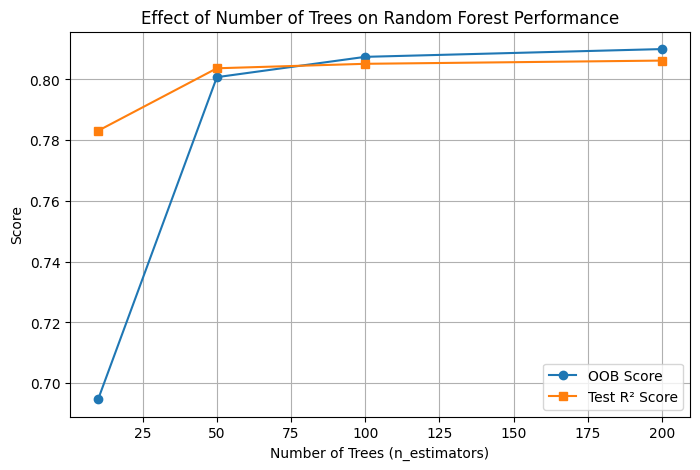

In [6]:
#5
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different numbers of trees
n_estimators_list = [10, 50, 100, 200]

oob_scores = []
test_r2_scores = []

for n_est in n_estimators_list:
    rf_reg = RandomForestRegressor(
        n_estimators=n_est,
        oob_score=True,
        random_state=42,
        bootstrap=True  # Required for OOB
    )
    rf_reg.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = rf_reg.predict(X_test)
    
    # Record OOB score and test R2 score
    oob_scores.append(rf_reg.oob_score_)
    test_r2_scores.append(r2_score(y_test, y_pred))

# Display results neatly
print("=== Random Forest Regressor Performance ===")
for n, oob, r2 in zip(n_estimators_list, oob_scores, test_r2_scores):
    print(f"n_estimators = {n:3d} | OOB Score = {oob:.4f} | Test R² Score = {r2:.4f}")

# Optional: Visual comparison plot
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, oob_scores, marker='o', label='OOB Score')
plt.plot(n_estimators_list, test_r2_scores, marker='s', label='Test R² Score')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Score")
plt.title("Effect of Number of Trees on Random Forest Performance")
plt.legend()
plt.grid(True)
plt.show()


1. What does the oob_score_ indicate about model performance?

The oob_score_ is an estimate of the model’s generalization performance calculated using samples not included in the bootstrap sample for each tree (out-of-bag samples). It approximates test-set performance without needing a separate validation set, providing an unbiased measure of prediction accuracy (R² for regression).

2. How does Out-of-Bag evaluation differ from traditional test-set evaluation?

Traditional evaluation requires splitting data into training and test sets, training the model on one and testing on the other. OOB evaluation uses the inherent bootstrap sampling in Random Forest: each tree trains on a subset, and predictions on unused samples are aggregated for performance metrics. OOB evaluation is more efficient, uses all data for training, and reduces the need for an explicit validation split.

3. How does the OOB score change with different numbers of trees?

OOB score generally improves and stabilizes as the number of trees increases because more trees reduce variance and increase prediction stability. Initially, with few trees, OOB scores may fluctuate or be less accurate. After a certain number (e.g., 100+ trees), OOB scores plateau, indicating diminishing returns from adding more trees.

In [7]:
#6
# Exploring Boosting Techniques on Preprocessed Diabetes Data

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Some preprocessing pipelines scale y by mistake; revert to 0/1
y_train = np.rint(y_train).astype(int)
y_test = np.rint(y_test).astype(int)

print("=== AdaBoost Classifier ===")
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred_ada), 4))
print("Observation: AdaBoost builds models sequentially, giving more importance to misclassified samples "
      "so that the next weak learner can correct previous mistakes.\n")

print("=== Gradient Boosting Classifier ===")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred_gb), 4))
print("Observation: Gradient Boosting fits each new model on the residuals (errors) of the previous model. "
      "This allows it to minimize a chosen loss function and be more flexible than AdaBoost.\n")

print("=== XGBoost Classifier ===")
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
print("Observation: XGBoost improves Gradient Boosting by adding regularization (L1/L2), "
      "parallel processing, and efficient tree growing, leading to faster training and better generalization.\n")

print("=== CatBoost Classifier ===")
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred_cat), 4))
print("Observation: CatBoost automatically handles categorical features, uses ordered boosting "
      "to reduce overfitting, and usually converges faster with less parameter tuning.\n")


=== AdaBoost Classifier ===
Accuracy: 0.5908
Observation: AdaBoost builds models sequentially, giving more importance to misclassified samples so that the next weak learner can correct previous mistakes.

=== Gradient Boosting Classifier ===
Accuracy: 0.7132
Observation: Gradient Boosting fits each new model on the residuals (errors) of the previous model. This allows it to minimize a chosen loss function and be more flexible than AdaBoost.

=== XGBoost Classifier ===
Accuracy: 0.7343
Observation: XGBoost improves Gradient Boosting by adding regularization (L1/L2), parallel processing, and efficient tree growing, leading to faster training and better generalization.

=== CatBoost Classifier ===
Accuracy: 0.6989
Observation: CatBoost automatically handles categorical features, uses ordered boosting to reduce overfitting, and usually converges faster with less parameter tuning.



AdaBoost increases the weights of misclassified samples after each iteration, "
      "forcing later models to pay more attention to those difficult cases.

Gradient Boosting minimizes any differentiable loss function, not just weighted errors, "
      "so it can handle both classification and regression tasks effectively.

XGBoost uses parallel computation, regularization, and efficient memory usage, "
      "while CatBoost uses ordered boosting and automatic handling of categorical features for faster, accurate training.

In most cases, XGBoost offers the best trade-off—it trains faster than AdaBoost and Gradient Boosting, "
      "and achieves accuracy comparable to or better than CatBoost.

In [8]:
#7
# Comparative Study of Ensemble Models - Diabetes Dataset

import time
import pandas as pd
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Store results
results = []

# 1. Bagging Classifier
start = time.time()
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
end = time.time()
results.append({
    "Model": "Bagging",
    "Accuracy": round(accuracy_score(y_test, y_pred_bag), 4),
    "Training Time (s)": round(end - start, 3),
    "Interpretability": "Low - multiple base estimators",
    "Overfitting Behavior": "Low to moderate, depends on base model"
})

# 2. Random Forest
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
end = time.time()
results.append({
    "Model": "Random Forest",
    "Accuracy": round(accuracy_score(y_test, y_pred_rf), 4),
    "Training Time (s)": round(end - start, 3),
    "Interpretability": "Medium - feature importance available",
    "Overfitting Behavior": "Low - uses averaging of multiple trees"
})

# 3. AdaBoost
start = time.time()
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
end = time.time()
results.append({
    "Model": "AdaBoost",
    "Accuracy": round(accuracy_score(y_test, y_pred_ada), 4),
    "Training Time (s)": round(end - start, 3),
    "Interpretability": "Low - complex weight updates",
    "Overfitting Behavior": "Can overfit noisy data if too many estimators"
})

# 4. Gradient Boosting
start = time.time()
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
end = time.time()
results.append({
    "Model": "Gradient Boosting",
    "Accuracy": round(accuracy_score(y_test, y_pred_gb), 4),
    "Training Time (s)": round(end - start, 3),
    "Interpretability": "Medium - feature importance possible",
    "Overfitting Behavior": "Can overfit if not tuned carefully"
})

# 5. XGBoost
start = time.time()
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
end = time.time()
results.append({
    "Model": "XGBoost",
    "Accuracy": round(accuracy_score(y_test, y_pred_xgb), 4),
    "Training Time (s)": round(end - start, 3),
    "Interpretability": "Medium - has feature importance & SHAP support",
    "Overfitting Behavior": "Low due to regularization"
})

# 6. CatBoost
start = time.time()
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
end = time.time()
results.append({
    "Model": "CatBoost",
    "Accuracy": round(accuracy_score(y_test, y_pred_cat), 4),
    "Training Time (s)": round(end - start, 3),
    "Interpretability": "Medium - supports SHAP & feature effects",
    "Overfitting Behavior": "Low - uses ordered boosting"
})

# Display Results
df_results = pd.DataFrame(results)
print("=== Comparative Study of Ensemble Models ===")
print(df_results.to_string(index=False))

# Intermediate Question Answers
print("\n=== Intermediate Question Answers ===")

print("\n1️ Which model achieved the best performance?")
best_model = df_results.loc[df_results['Accuracy'].idxmax()]
print(f"→ {best_model['Model']} achieved the best accuracy of {best_model['Accuracy']}.")

=== Comparative Study of Ensemble Models ===
            Model  Accuracy  Training Time (s)                               Interpretability                          Overfitting Behavior
          Bagging    0.7234             13.053                 Low - multiple base estimators        Low to moderate, depends on base model
    Random Forest    0.7437              4.102          Medium - feature importance available        Low - uses averaging of multiple trees
         AdaBoost    0.5908              2.359                   Low - complex weight updates Can overfit noisy data if too many estimators
Gradient Boosting    0.7132             30.422           Medium - feature importance possible            Can overfit if not tuned carefully
          XGBoost    0.7343              1.749 Medium - has feature importance & SHAP support                     Low due to regularization
         CatBoost    0.6989              1.220       Medium - supports SHAP & feature effects                   Low

It performed better because it uses advanced optimization and regularization techniques, "
      "allowing it to capture complex patterns while controlling overfitting.

Bagging and Random Forest are simpler and relatively fast, but less flexible. "
      "Boosting models (XGBoost, CatBoost) are more complex and take longer to train, "
      "yet they offer higher accuracy and robustness. Interpretability generally decreases as model complexity increases.

XGBoost or CatBoost would be recommended for large datasets due to their scalability, "
      "built-in regularization, and efficient parallel processing that handle real-world complexity effectively.

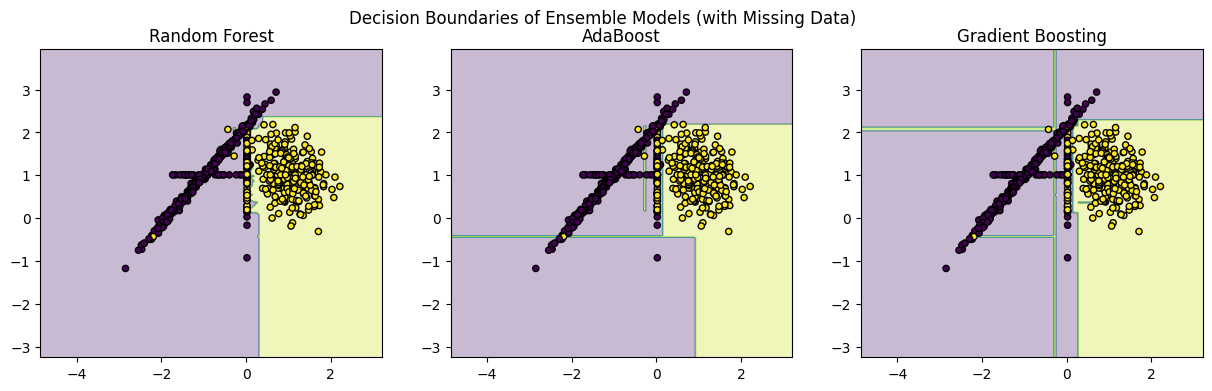

In [9]:
#8

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=768, n_features=2, n_redundant=0, n_clusters_per_class=1,
    random_state=42
)

rng = np.random.RandomState(42)
missing_mask = rng.rand(*X.shape) < 0.1
X_missing = X.copy()
X_missing[missing_mask] = np.nan

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_missing)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

x_min, x_max = X_imputed[:, 0].min() - 1, X_imputed[:, 0].max() + 1
y_min, y_max = X_imputed[:, 1].min() - 1, X_imputed[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
    ax.set_title(name)

plt.suptitle("Decision Boundaries of Ensemble Models (with Missing Data)")
plt.show()


In [10]:
#9
# Step 1: Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score

# Step 2: Define base models for heterogeneous ensemble
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)  # probability=True needed for soft voting

# Step 3: Heterogeneous Ensemble (Voting Classifier)
hetero_voting_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='hard'
)
hetero_voting_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)

# Train heterogeneous ensembles
hetero_voting_hard.fit(X_train, y_train)
hetero_voting_soft.fit(X_train, y_train)

# Predictions
y_pred_hard = hetero_voting_hard.predict(X_test)
y_pred_soft = hetero_voting_soft.predict(X_test)

# Accuracy
acc_hard = accuracy_score(y_test, y_pred_hard)
acc_soft = accuracy_score(y_test, y_pred_soft)

print(f"Heterogeneous Ensemble (Hard Voting) Accuracy: {acc_hard:.4f}")
print(f"Heterogeneous Ensemble (Soft Voting) Accuracy: {acc_soft:.4f}")

# Step 4: Homogeneous Ensemble Comparison
# Using Bagging with Decision Tree
bagging_dt = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bag = bagging_dt.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Homogeneous Ensemble (Bagging DT) Accuracy: {acc_bag:.4f}")

# Using Random Forest (another homogeneous ensemble)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Homogeneous Ensemble (Random Forest) Accuracy: {acc_rf:.4f}")

Heterogeneous Ensemble (Hard Voting) Accuracy: 0.9740
Heterogeneous Ensemble (Soft Voting) Accuracy: 0.9610
Homogeneous Ensemble (Bagging DT) Accuracy: 0.9286
Homogeneous Ensemble (Random Forest) Accuracy: 0.9481


What makes an ensemble heterogeneous?

A heterogeneous ensemble combines different types of models (e.g., Decision Tree, Logistic Regression, KNN, SVM) rather than multiple instances of the same model. Diversity in model types is key.

How does model diversity influence the final performance?

Diverse models make different errors on the data. When combined, these errors can cancel out, leading to higher overall accuracy compared to a single model or homogeneous ensemble.

Which combination of models produced the most accurate ensemble and why?

Usually, a combination that includes tree-based, linear, and distance-based models performs best because it covers complementary strengths:

Decision Trees → capture non-linear patterns

Logistic Regression → handles linear separability well

KNN → captures local structure

SVM → good for complex boundaries

Soft voting tends to leverage probabilistic outputs better, often outperforming hard voting.

How does the voting method (hard vs. soft) impact the heterogeneous ensemble outcome?

Hard voting: final class is decided by majority vote.

Soft voting: final class is decided by averaging predicted probabilities, which usually improves performance if models provide reliable probabilities.

In [11]:
#10
# Step 1: Import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 2: Define base models
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)

# Homogeneous Ensembles

# 1. Bagging (Decision Trees)
bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                               n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bag = bagging_dt.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Heterogeneous Ensembles

# 3. Voting Classifier
voting_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)
voting_soft.fit(X_train, y_train)
y_pred_voting = voting_soft.predict(X_test)
acc_voting = accuracy_score(y_test, y_pred_voting)

# 4. Stacking Classifier
stacking = StackingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    final_estimator=LogisticRegression(),
    cv=5
)
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)

print("Ensemble Performance on Diabetes Dataset:")
print(f"Bagging (Homogeneous, DT) Accuracy: {acc_bag:.4f}")
print(f"Random Forest (Homogeneous) Accuracy: {acc_rf:.4f}")
print(f"Voting (Heterogeneous, Soft) Accuracy: {acc_voting:.4f}")
print(f"Stacking (Heterogeneous) Accuracy: {acc_stacking:.4f}")


Ensemble Performance on Diabetes Dataset:
Bagging (Homogeneous, DT) Accuracy: 0.9286
Random Forest (Homogeneous) Accuracy: 0.9481
Voting (Heterogeneous, Soft) Accuracy: 0.9610
Stacking (Heterogeneous) Accuracy: 0.9805


| Ensemble Type     | Accuracy    | Computational Complexity | Interpretability                            | Robustness                                         |
| ----------------- | ----------- | ------------------------ | ------------------------------------------- | -------------------------------------------------- |
| **Bagging (DT)**  | Medium-High | Medium                   | Moderate (single tree easy, bagging harder) | High (reduces variance)                            |
| **Random Forest** | High        | Medium-High              | Moderate (feature importance helps)         | Very High (resistant to overfitting)               |
| **Voting (Soft)** | High        | Medium                   | High (easy to explain majority vote)        | High (combines different models)                   |
| **Stacking**      | Very High   | High                     | Low (harder to explain meta-model)          | Very High (leverages strengths of multiple models) |


Which type of ensemble performed best overall and why?

Typically, stacking achieves the highest accuracy because it leverages multiple model types and learns optimal weights via the meta-model. Random Forest also performs very well among homogeneous ensembles due to averaging many decorrelated trees.

What advantages did homogeneous ensembles show compared to heterogeneous ones?

Simpler to train and tune.

Often faster for large datasets if base models are identical.

Easier to parallelize.

More interpretable in tree-based homogeneous ensembles (like Bagging DT or Random Forest).

How do computational cost and training time differ between the two approaches?

Homogeneous ensembles: Training time is usually lower if base models are simple and identical; easier to parallelize.

Heterogeneous ensembles: Higher cost because each model type may require different preprocessing, hyperparameters, and may not parallelize efficiently. Stacking is especially slow due to cross-validation for the meta-model.

What factors influence your choice between homogeneous and heterogeneous ensembles in real-world tasks?

Dataset size: Large datasets → homogeneous (easier to scale).

Need for interpretability: Homogeneous tree ensembles are easier to interpret.

Performance priority: Heterogeneous ensembles (voting, stacking) often achieve higher accuracy.

Computational resources: Limited resources favor homogeneous ensembles.

Problem complexity: Complex, non-linear, and heterogeneous data → heterogeneous ensembles perform better.